In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from dotenv import load_dotenv
from huggingface_hub import notebook_login

In [44]:
dataset_name = "./Womens Clothing E-Commerce Reviews.csv"

In [46]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

def load_env_variables():
    if not os.path.exists('.env'):
        raise('Exception: .env file not found on working area')
    load_dotenv()

def login_huggingface_hub():
    notebook_login()
    
def install_packages():
    print('Installing packages...')
    !curl -O https://raw.githubusercontent.com/wilberquito/sentimental-analysis-twitter/clothing-e-comerce-opinion/requirements.txt
    !pip install -r requirements.txt

def download_data():
    print('Downloading dataset...')
    !curl -O https://raw.githubusercontent.com/wilberquito/sentimental-analysis-twitter/clothing-e-comerce-opinion/scripts/download-data.sh
    !chmod +x download-data.sh

load_env_variables()
login_huggingface()

if IN_COLAB:
    install = input('Install Python packages [Y/n]')
    if install == 'Y':
        install_packages()

    if not os.path.exists(dataset_name):
        download_data()

Datasets origin from kaggle, check out [here](https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews).

This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Rating**: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

In [5]:
cols = pd.read_csv(dataset_name, nrows=1).columns
reviews_df = pd.read_csv(dataset_name, usecols=cols[1:])
cols = [col.lower() for col in reviews_df.columns]
reviews_df.columns = cols
reviews_df.head()

,clothing id,age,title,review text,rating,recommended ind,positive feedback count,division name,department name,class name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [6]:
reviews_df.shape

(23486, 10)

In [7]:
reviews_df.describe()

,clothing id,age,rating,recommended ind,positive feedback count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [8]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   clothing id              23486 non-null  int64 
 1   age                      23486 non-null  int64 
 2   title                    19676 non-null  object
 3   review text              22641 non-null  object
 4   rating                   23486 non-null  int64 
 5   recommended ind          23486 non-null  int64 
 6   positive feedback count  23486 non-null  int64 
 7   division name            23472 non-null  object
 8   department name          23472 non-null  object
 9   class name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [9]:
reviews_df["rating"].value_counts()

,count
rating,
5,13131
4,5077
3,2871
2,1565
1,842


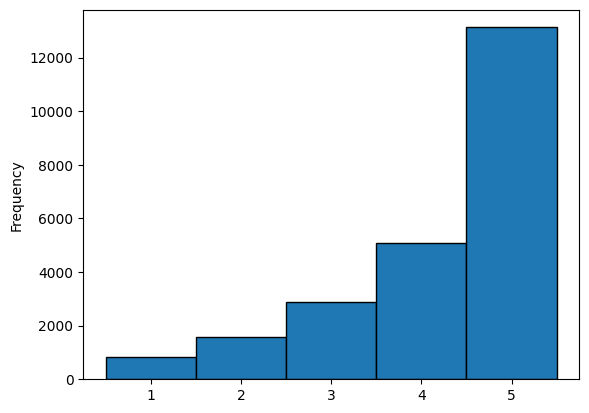

In [10]:
ax = reviews_df["rating"].plot(kind="hist", bins=np.arange(0, 6) + 0.5, ec='k')
plt.show()

In [11]:
def soft_rating(rating):
    new_rating = 3
    if rating <= 3:
        new_rating = 1
    elif rating <= 4:
        new_rating = 2
    return new_rating


reviews_df["soft rating"] = reviews_df["rating"].map(soft_rating)
reviews_df.head()

,clothing id,age,title,review text,rating,recommended ind,positive feedback count,division name,department name,class name,soft rating
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,2
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,3
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,1
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,3
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,3


In [12]:
reviews_df["soft rating"].value_counts()

,count
soft rating,
3,13131
1,5278
2,5077


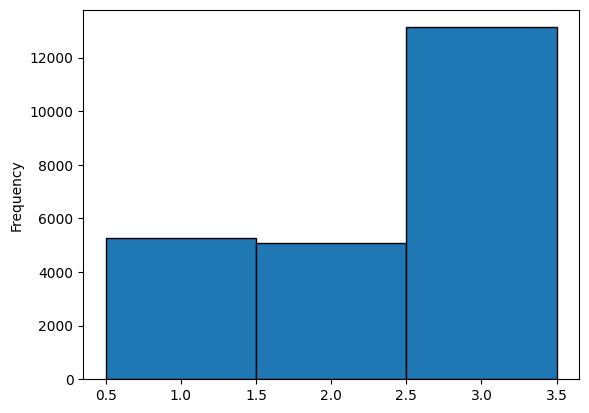

In [13]:
ax = reviews_df["soft rating"].plot(kind="hist", bins=np.arange(0, 4) + 0.5, ec="k")
plt.show()

## Removing not usuful data

In [14]:
numeric_reviews_df = reviews_df.select_dtypes(include="number").drop(
    labels=["clothing id"], axis=1
)
numeric_reviews_df.corr()

,age,rating,recommended ind,positive feedback count,soft rating
age,1.000000,0.026831,0.030622,0.043079,0.036042
rating,0.026831,1.000000,0.792336,-0.064961,0.941389
recommended ind,0.030622,0.792336,1.000000,-0.069045,0.726893
positive feedback count,0.043079,-0.064961,-0.069045,1.000000,-0.062530
soft rating,0.036042,0.941389,0.726893,-0.062530,1.000000


From this information it is pretty clear that `positive feedback count` bothers more than helps.
And not only that but it is a feature that doesn't really talk about the user opinion but
how other interpreted.

In [15]:
reviews_df = reviews_df.drop(labels=["positive feedback count"], axis=1, errors='ignore')
reviews_df.head(3)

,clothing id,age,title,review text,rating,recommended ind,division name,department name,class name,soft rating
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,Initmates,Intimate,Intimates,2
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,General,Dresses,Dresses,3
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses,1


In [16]:
reviews_df['division name'].value_counts()

,count
division name,
General,13850
General Petite,8120
Initmates,1502


In [17]:
reviews_df['department name'].value_counts()

,count
department name,
Tops,10468
Dresses,6319
Bottoms,3799
Intimate,1735
Jackets,1032
Trend,119


In [18]:
reviews_df['class name'].value_counts()

,count
class name,
Dresses,6319
Knits,4843
Blouses,3097
Sweaters,1428
Pants,1388
Jeans,1147
Fine gauge,1100
Skirts,945
Jackets,704


I decide to drop the features above because they are not balanced at all and to make things simpler.

In [19]:
reviews_df = reviews_df.drop(labels=['division name', 'department name', 'class name'], axis=1, errors='ignore')
reviews_df.head(3)

,clothing id,age,title,review text,rating,recommended ind,soft rating
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,2
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,3
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,1


In [20]:
spam = 10
spam_window = spam / 2
limit = int(100 / spam)
bins = np.array([x*spam for x in range(limit)]) + spam_window
bins

array([ 5., 15., 25., 35., 45., 55., 65., 75., 85., 95.])

In [21]:
np.histogram(reviews_df['age'], bins = bins)

(array([   0,  892, 5175, 7771, 5110, 3152, 1193,  161,   30]),
 array([ 5., 15., 25., 35., 45., 55., 65., 75., 85., 95.]))

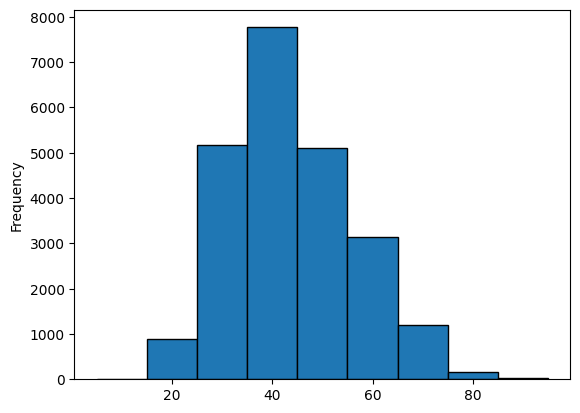

In [22]:
reviews_df['age'].plot(kind='hist', bins=bins, ec='k')
plt.show()

In [23]:
def soft_age(age):
    generation = 3
    if age < 35:
        generation = 1
    elif age < 55:
        generation = 2
    return generation

reviews_df['generation'] = reviews_df['age'].map(soft_age)
reviews_df.head(3)

,clothing id,age,title,review text,rating,recommended ind,soft rating,generation
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,2,1
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,3,1
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,1,3


In [24]:
reviews_df['generation'].value_counts()

,count
generation,
2,12881
1,6067
3,4538


## Check out missing values

In [25]:
reviews_df.isna().any()

,0
clothing id,False
age,False
title,True
review text,True
rating,False
recommended ind,False
soft rating,False
generation,False


Aham, there are some missing values. Let's figure it out how many for each feature.

In [26]:
reviews_df.isna().sum()

,0
clothing id,0
age,0
title,3810
review text,845
rating,0
recommended ind,0
soft rating,0
generation,0


Well, what about the % of missing values to respect the hole dataset?

In [27]:
(reviews_df.isna().sum() * 100) / reviews_df.shape[0]

,0
clothing id,0.000000
age,0.000000
title,16.222430
review text,3.597888
rating,0.000000
recommended ind,0.000000
soft rating,0.000000
generation,0.000000


What it bothers me the most if the 16% of missing values for titles.
But there is arround 3.6% of missing descriptions which are the big problems.
Titles can be generated as resume from the description but not the other way arround.

In [28]:
reviews_df = reviews_df[~reviews_df['review text'].isna()]
reviews_df = reviews_df.reset_index()
reviews_df.head(3)

,index,clothing id,age,title,review text,rating,recommended ind,soft rating,generation
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,2,1
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,3,1
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,1,3


In [29]:
reviews_df['title'].head(3)

,title
0,NaN
1,NaN
2,Some major design flaws


## Main features

In [30]:
features = [
    'clothing id',
    'title',
    'review text',
    'soft rating',
    'recommended ind',
    'generation'
]

reviews_df['soft rating'] = reviews_df['soft rating'].astype('category')
reviews_df['generation'] = reviews_df['generation'].astype('category')

reviews_df = reviews_df[features]
reviews_df.head(3)

,clothing id,title,review text,soft rating,recommended ind,generation
0,767,NaN,Absolutely wonderful - silky and sexy and comf...,2,1,1
1,1080,NaN,Love this dress! it's sooo pretty. i happene...,3,1,1
2,1077,Some major design flaws,I had such high hopes for this dress and reall...,1,0,3


In [31]:
reviews_df.dtypes

,0
clothing id,int64
title,object
review text,object
soft rating,category
recommended ind,int64
generation,category


## Generate summaries from reviews

In [32]:
from sklearn.model_selection import train_test_split
from datasets import Dataset, DatasetDict

def generate_datasets(reviews, test_size=0.2, stratify='soft rating'):

    titled_reviews = reviews[~reviews['title'].isna()]
    infer_reviews = reviews[reviews['title'].isna()]

    train, test = train_test_split(
        titled_reviews, test_size=test_size, stratify=titled_reviews[stratify])


    datasets = [Dataset.from_pandas(df) for df in [train, test, infer_reviews]]
    dataset_names = ['train', 'test', 'infer']

    dict_datasets = dict(zip(dataset_names, datasets))

    train_datasets = DatasetDict(
        {
            'train': dict_datasets['train'],
            'test': dict_datasets['test']
        }
    )

    infer_dataset = dict_datasets['infer']

    return train_datasets, infer_dataset


train_datasets, infer_dataset = generate_datasets(reviews_df)
train_datasets, infer_dataset

(DatasetDict({
     train: Dataset({
         features: ['clothing id', 'title', 'review text', 'soft rating', 'recommended ind', 'generation', '__index_level_0__'],
         num_rows: 15740
     })
     test: Dataset({
         features: ['clothing id', 'title', 'review text', 'soft rating', 'recommended ind', 'generation', '__index_level_0__'],
         num_rows: 3935
     })
 }),
 Dataset({
     features: ['clothing id', 'title', 'review text', 'soft rating', 'recommended ind', 'generation', '__index_level_0__'],
     num_rows: 2966
 }))

In [33]:
from transformers import AutoTokenizer

checkpoint = "google-t5/t5-small"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

In [34]:
prefix = "summarize: "

def preprocess_function(examples):
    inputs = [prefix + doc for doc in examples["review text"]]

    model_inputs = tokenizer(
        inputs, max_length=1024,
        truncation=True,
        padding='max_length',
        return_tensors='pt'
    )
    labels = tokenizer(
        text_target=examples["title"],
        max_length=128,
        truncation=True,
        padding='max_length',
        return_tensors="pt"
    )

    model_inputs["labels"] = labels["input_ids"]

    return model_inputs

In [35]:
batch_size = 256
batched = True
train_datasets = train_datasets.map(preprocess_function, batch_size=batch_size, batched=batched)

Map:   0%|          | 0/15740 [00:00<?, ? examples/s]

Map:   0%|          | 0/3935 [00:00<?, ? examples/s]

In [36]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=checkpoint)

In [37]:
import evaluate

rouge = evaluate.load("rouge")

In [38]:
import numpy as np


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    result = rouge.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)

    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions]
    result["gen_len"] = np.mean(prediction_lens)

    return {k: round(v, 4) for k, v in result.items()}

In [39]:
from transformers import AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer

model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint)

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [40]:
model

T5ForConditionalGeneration(
  (shared): Embedding(32128, 512)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 512)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=512, out_features=512, bias=False)
              (k): Linear(in_features=512, out_features=512, bias=False)
              (v): Linear(in_features=512, out_features=512, bias=False)
              (o): Linear(in_features=512, out_features=512, bias=False)
              (relative_attention_bias): Embedding(32, 8)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=512, out_features=2048, bias=False)
              (wo): Linear(in_features=2048, out_features=512, bias=False)
              (dropout): Drop

In [41]:
import torch

torch.cuda.is_available()

True

In [42]:
mem_info = torch.cuda.mem_get_info()
mem_info[0] * 100 / mem_info[1]

99.31797395223334

In [56]:
torch.cuda.empty_cache()

In [57]:
batch_size = 16
learning_rate = 2e-5
weight_decay = 0.01
epochs = 1

training_args = Seq2SeqTrainingArguments(
    output_dir="e-comerce",
    eval_strategy="epoch",
    learning_rate=learning_rate,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=weight_decay,
    save_total_limit=3,
    num_train_epochs=epochs,
    predict_with_generate=True,
    fp16=True,
    push_to_hub=False,
)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_datasets["train"],
    eval_dataset=train_datasets["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum,Gen Len
1,0.191500,0.149967,0.128300,0.028600,0.127600,0.127600,4.121500


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1249: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


TrainOutput(global_step=984, training_loss=0.17967467579415175, metrics={'train_runtime': 1050.261, 'train_samples_per_second': 14.987, 'train_steps_per_second': 0.937, 'total_flos': 4260559910338560.0, 'train_loss': 0.17967467579415175, 'epoch': 1.0})

In [59]:
text = "summarize: The Inflation Reduction Act lowers prescription drug costs, health care costs, and energy costs. It's the most aggressive action on tackling the climate crisis in American history, which will lift up American workers and create good-paying, union jobs across the country. It'll lower the deficit and ask the ultra-wealthy and corporations to pay their fair share. And no one making under $400,000 per year will pay a penny more in taxes."

In [68]:
text

"summarize: The Inflation Reduction Act lowers prescription drug costs, health care costs, and energy costs. It's the most aggressive action on tackling the climate crisis in American history, which will lift up American workers and create good-paying, union jobs across the country. It'll lower the deficit and ask the ultra-wealthy and corporations to pay their fair share. And no one making under $400,000 per year will pay a penny more in taxes."

In [ ]:

from transformers import AutoTokenizer

loaded_model = AutoTokenizer.from_pretrained("./awesome_model/checkpoint-984/")
loaded_model

In [67]:
from transformers import pipeline

summarizer = pipeline("summarization", model='./awesome_model/checkpoint-984/')
summarizer(text)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Your max_length is set to 200, but your input_length is only 103. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=51)


[{'summary_text': 'Inflation Reduction Act lowers prescription drug costs, health care costs, and energy costs . no one will pay a penny more in taxes .'}]

In [69]:
from huggingface_hub import notebook_login

notebook_login()